<a href="https://colab.research.google.com/github/fsribeirorj/Capstone-IBM---Data-Science/blob/master/Projeto_Churn_TIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

<h3><b>Case Cientista de Dados - Especialista Senior - TIM</b></h3>
<b>Autor:</b> Fabio Ribeiro

In [2]:
df = pd.read_csv("Telco-Customer-Churn_Case.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
s=df["Churn"].value_counts().reset_index()
px.pie(s,names="index",values="Churn",title="Análise da Base Churn",)

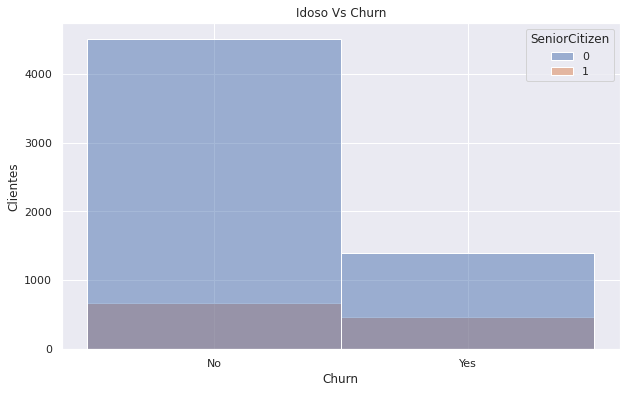

In [6]:
df_SeniorCitizen = df.groupby(['SeniorCitizen', 'Churn']).size()
#df_SeniorCitizen.plot.bar(rot=100)

df_SeniorCitizen

plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'Churn', hue = df['SeniorCitizen'])
plt.title("Idoso Vs Churn")
plt.xlabel("Churn")
plt.ylabel("Clientes")
plt.show()

In [8]:
df_n_idoso= df[df.SeniorCitizen==0]
df_n_idoso

s_n_idoso=df_n_idoso["Churn"].value_counts().reset_index()
px.pie(s_n_idoso,names="index",values="Churn",title="Porcentagem Churn Entre não Idosos")

In [9]:
df_s_idoso = df[df.SeniorCitizen==1]
df_s_idoso

s=df_s_idoso["Churn"].value_counts().reset_index()
px.pie(s,names="index",values="Churn",title="Porcentagem Churn entre Idosos")

In [10]:
df_contrato = df[df.Contract=='Month-to-month']
df_contrato

s=df_contrato["Churn"].value_counts().reset_index()
px.pie(s,names="index",values="Churn",title="Porcentagem de Churn entre Contrato - Mensal")

In [11]:
df_contrato = df[df.Contract=='One year']
df_contrato

s=df_contrato["Churn"].value_counts().reset_index()
px.pie(s,names="index",values="Churn",title="Porcentagem de Churn entre Contrato - Anual")

In [12]:
df_contrato = df[df.Contract=='Two year']
df_contrato

s=df_contrato["Churn"].value_counts().reset_index()
px.pie(s,names="index",values="Churn",title="Porcentagem de Churn entre Contrato - Bianual")

In [14]:
df_tenure = df.groupby(['tenure','Churn']).size()

df_tenure

tenure  Churn
0       No        11
1       No       233
        Yes      380
2       No       115
        Yes      123
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Length: 145, dtype: int64

In [60]:
df_contract = df.groupby(['Contract','Churn']).size()

df_contract

#df_contract.plot.pie(rot=100)

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
dtype: int64

In [ ]:
df_InternetService = df.groupby(['InternetService','Churn']).size()

df_InternetService

#df_InternetService.plot.pie(rot=100)



InternetService  Churn
DSL              0        1962
                 1         459
Fiber optic      0        1799
                 1        1297
No               0        1413
                 1         113
dtype: int64

In [ ]:
df_PaymentMethod = df.groupby(['PaymentMethod','Churn']).size()

df_PaymentMethod

#df_PaymentMethod.plot.pie(rot=100)






PaymentMethod              Churn
Bank transfer (automatic)  0        1286
                           1         258
Credit card (automatic)    0        1290
                           1         232
Electronic check           0        1294
                           1        1071
Mailed check               0        1304
                           1         308
dtype: int64

In [ ]:

df_StreamingTV = df.groupby(['StreamingTV','Churn']).size()

df_StreamingTV

#df_StreamingTV.plot.pie(rot=100)



StreamingTV          Churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
dtype: int64

In [ ]:
df_StreamingMovies = df.groupby(['StreamingMovies','Churn']).size()

df_StreamingMovies

#df_StreamingMovies.plot.pie(rot=100)


StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
dtype: int64

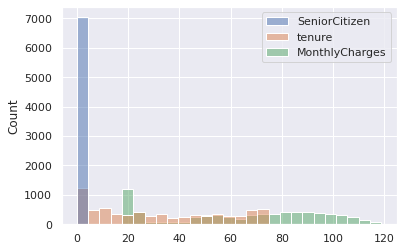

In [ ]:
sns.histplot(df['SeniorCitizen'])

In [15]:
df['Churn'] = df['Churn'].map({'No':'0',
                             'Yes':'1'},
                             na_action=None)
df['Contract'] = df['Contract'].map({'Month-to-month':'0',
                             'One year':'1',
                             'Two year':'2'},
                             na_action=None)
df['Partner'] = df['Partner'].map({'No':'0',
                             'Yes':'1'},
                             na_action=None)
df['InternetService'] = df['InternetService'].map({'No':'0',
                             'DSL':'1',
                             'Fiber optic':'2'},
                             na_action=None)
df['PaymentMethod'] = df['PaymentMethod'].map({'Bank transfer (automatic)':'0',
                             'Credit card (automatic)':'1',
                             'Electronic check':'2',
                             'Mailed check':'3'},
                             na_action=None)


df['Churn'] = pd.to_numeric(df['Churn'])
df['Contract'] = pd.to_numeric(df['Contract'])
df['Partner'] = pd.to_numeric(df['Partner'])
df['InternetService'] = pd.to_numeric(df['InternetService'])
df['PaymentMethod'] = pd.to_numeric(df['PaymentMethod'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   object 


In [17]:
#df_modelo = df[['SeniorCitizen', 'Partner','tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'Churn' ]]
df_modelo = df[['tenure',  'Contract', 'PaymentMethod', 'MonthlyCharges', 'Churn' ]]

df_modelo

,tenure,Contract,PaymentMethod,MonthlyCharges,Churn
0,1,0,2,29.85,0
1,34,1,3,56.95,0
2,2,0,3,53.85,1
3,45,1,0,42.30,0
4,2,0,2,70.70,1
...,...,...,...,...,...
7038,24,1,3,84.80,0
7039,72,1,1,103.20,0
7040,11,0,2,29.60,0
7041,4,0,3,74.40,1


In [18]:
#Data Processing.
from sklearn.model_selection import train_test_split


X = df_modelo.drop('Churn', axis=1)
y = df_modelo['Churn']



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (4930, 4)
Shape of test set: (2113, 4)


In [19]:
classifiers = [
                KNeighborsClassifier(),
                SVC(),
                LogisticRegression(),
                DecisionTreeClassifier(random_state=21),
                RandomForestClassifier(random_state=21)
]

for classifier in classifiers:
    pipe = Pipeline(steps=[("scaler", StandardScaler()), ("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print("Score do modelo " + str(classifier) + ": %.3f" % pipe.score(X_test, y_test))

Score do modelo KNeighborsClassifier(): 0.779
Score do modelo SVC(): 0.797
Score do modelo LogisticRegression(): 0.796
Score do modelo DecisionTreeClassifier(random_state=21): 0.730
Score do modelo RandomForestClassifier(random_state=21): 0.778


In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [21]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_predict = lg.predict(X_test)
lg.score(X_test, y_test)

0.79649787032655

In [22]:
lg_acc = accuracy_score(y_test, lg_predict)
print("Score Regressão Logística: ", lg_acc)

Score Regressão Logística:  0.79649787032655


In [23]:
score_lista=[]

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    score_lista.append(accuracy_score(y_test,knn_predict))
    #score_lista.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Score')

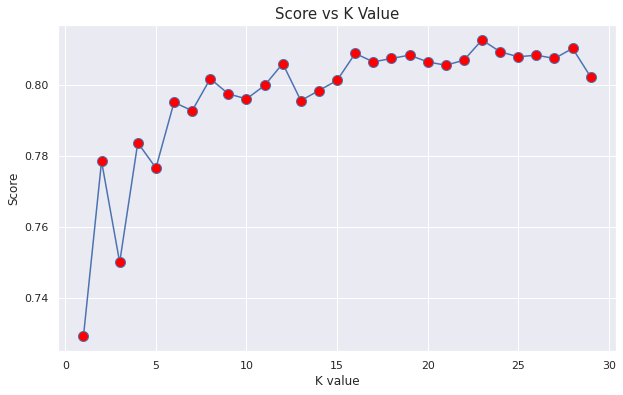

In [24]:
plt.figure(figsize =(10, 6))
plt.plot(range(1,30), score_lista, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value', size=15)
plt.xlabel('K value')
plt.ylabel('Score')

In [25]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print(knn.score(X_test, y_test) )
knn_acc = accuracy_score(y_test, knn_predict)
knn_acc

0.8064363464268812


0.8064363464268812

In [26]:
rf_score_lista=[]

for i in range(1,100):
    rf = RandomForestClassifier(random_state=21,n_estimators=i, max_depth=10, max_features=0.1)
    rf.fit(X_train, y_train)
    rf_predict = rf.predict(X_test)
    rf_score_lista.append(rf.score(X_test, y_test))

Text(0, 0.5, 'Score')

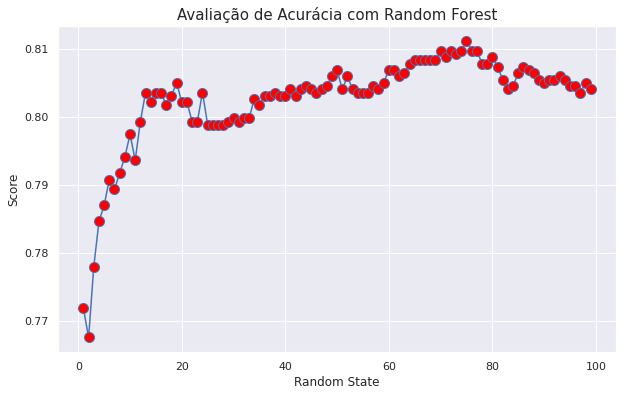

In [27]:
plt.figure(figsize =(10, 6))
plt.plot(range(1,100), rf_score_lista, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Avaliação de Acurácia com Random Forest', size=15)
plt.xlabel('Random State')
plt.ylabel('Score')

In [ ]:
rf_pipe = Pipeline([('scaler', StandardScaler()),
                     ('rf', RandomForestClassifier(random_state=75))])
pipe_params = [{
"rf__n_estimators": [1,50,100],
"rf__max_depth": [1, 5, 10, 25],
"rf__max_features": [*np.arange(0.1, 1.1, 0.1)]
}]

gs_rf = GridSearchCV(rf_pipe,
                      param_grid=pipe_params,
                      scoring='accuracy',
                      cv=5)


gs_rf.fit(X_train, y_train)
gs_rf_predict = gs_rf.predict(X_test)

In [ ]:
gs_rf.best_params_

{'rf__max_depth': 5, 'rf__max_features': 0.1, 'rf__n_estimators': 100}

In [ ]:
gs_rf.score(X_test, y_test)

0.8092759110269758

In [ ]:
gs_rf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, max_features=0.1,
                                        random_state=75))])